## Import Lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

## Import Data

In [11]:
df_cabdata = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_cusid = pd.read_csv("Customer_ID.csv")
df_tranid = pd.read_csv("Transaction_ID.csv")
# To display the top 5 rows
print(df_cabdata.head(5))
print(df_city.head(5))
print(df_cusid.head(5))
print(df_tranid.head(5))

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   

## Checking the data type

In [12]:

print(df_cabdata.dtypes)
print(df_city.dtypes)
print(df_cusid.dtypes)
print(df_tranid.dtypes)

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object
City          object
Population    object
Users         object
dtype: object
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


## Finding the null values.

In [14]:
print(df_cabdata.isnull().sum())
print(df_city.isnull().sum())
print(df_cusid.isnull().sum())
print(df_tranid.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


#### All datasets has no missing values. 

## Counting number of rows.

In [32]:
# remove spaces in columns name
df_cabdata.columns = df_cabdata.columns.str.replace(' ','_')
df_city.columns = df_city.columns.str.replace(' ','_')
df_cusid.columns = df_cusid.columns.str.replace(' ','_')
df_tranid.columns = df_tranid.columns.str.replace(' ','_')

In [33]:
print(df_cabdata.count())
print(df_city.count())
print(df_cusid.count())
print(df_tranid.count())

Transaction_ID    359392
Date_of_Travel    359392
Company           359392
City              359392
KM_Travelled      359392
Price_Charged     359392
Cost_of_Trip      359392
dtype: int64
City          20
Population    20
Users         20
dtype: int64
Customer_ID           49171
Gender                49171
Age                   49171
Income_(USD/Month)    49171
dtype: int64
Transaction_ID    440098
Customer_ID       440098
Payment_Mode      440098
dtype: int64


## Plotting a Histogram

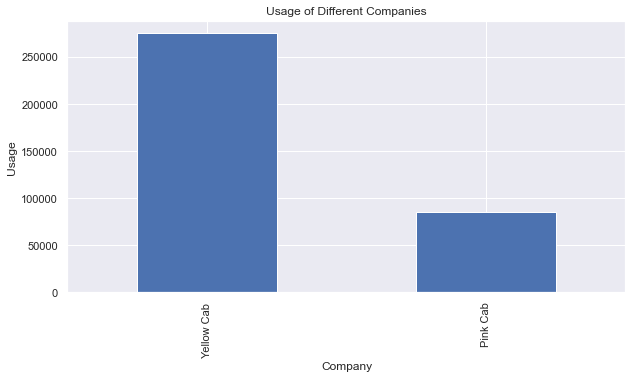

In [34]:
df_cabdata.Company.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Usage of Different Companies')
plt.ylabel('Usage')
plt.xlabel('Company');


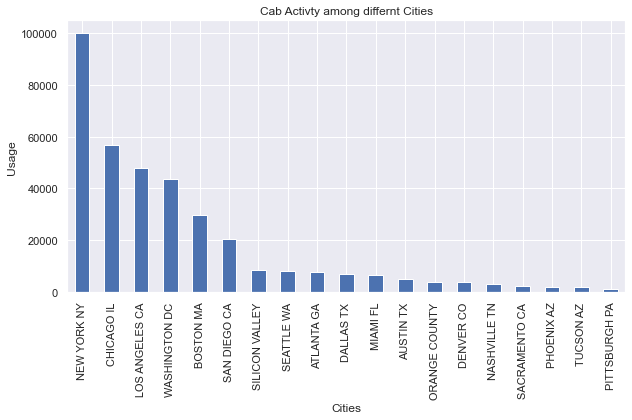

In [43]:
df_cabdata.City.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Cab Activty among differnt Cities')
plt.ylabel('Usage')
plt.xlabel('Cities');


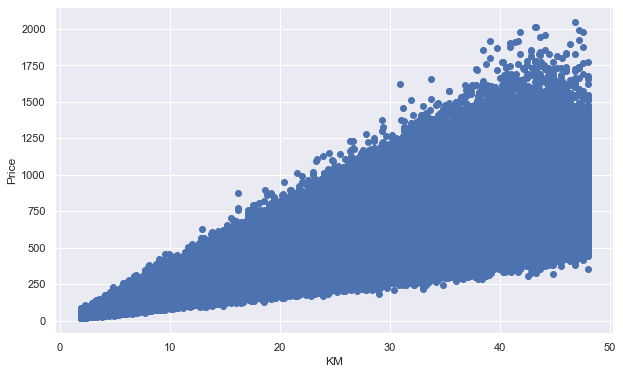

In [39]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_cabdata['KM_Travelled'], df_cabdata['Price_Charged'])
ax.set_xlabel('KM')
ax.set_ylabel('Price')
plt.show()

## Finding the relations between the variables.

,Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip
Transaction_ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462
Date_of_Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484
KM_Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848
Price_Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812
Cost_of_Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000


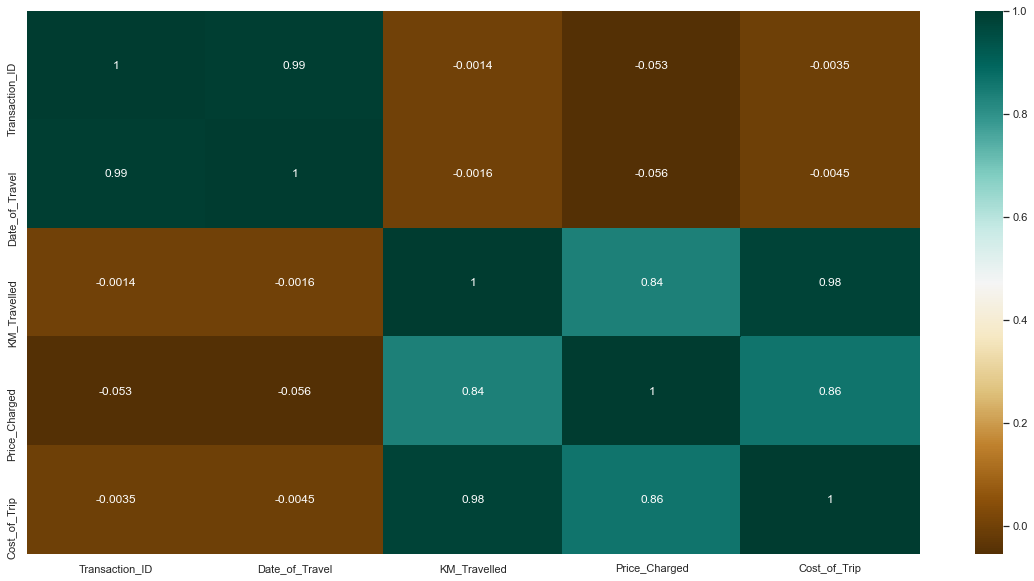

In [45]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df_cabdata.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#### It can be seen that there are relations between KM traveled, Price charged, Cost of trip.

,Customer_ID,Age,Income_(USD/Month)
Customer_ID,1.000000,-0.006749,-0.006911
Age,-0.006749,1.000000,0.000156
Income_(USD/Month),-0.006911,0.000156,1.000000


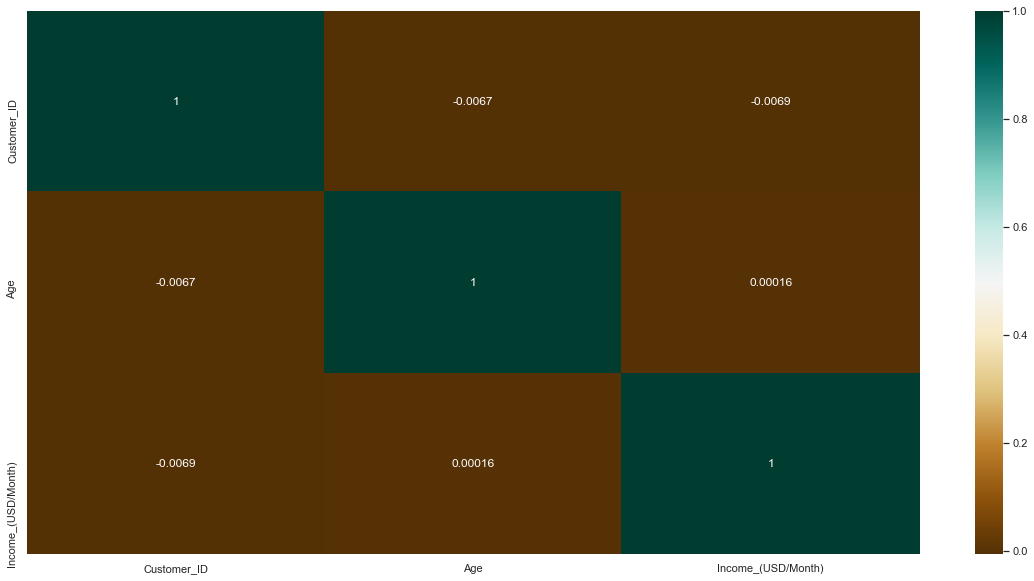

In [48]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df_cusid.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

,Transaction_ID,Customer_ID
Transaction_ID,1.000000,-0.021289
Customer_ID,-0.021289,1.000000


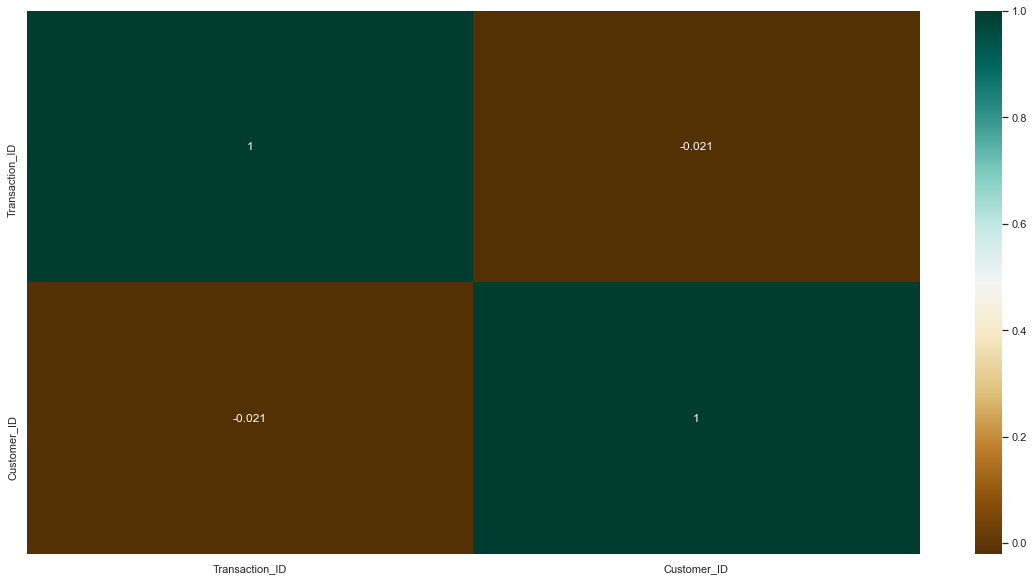

In [50]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df_tranid.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Visualization made using Tableau

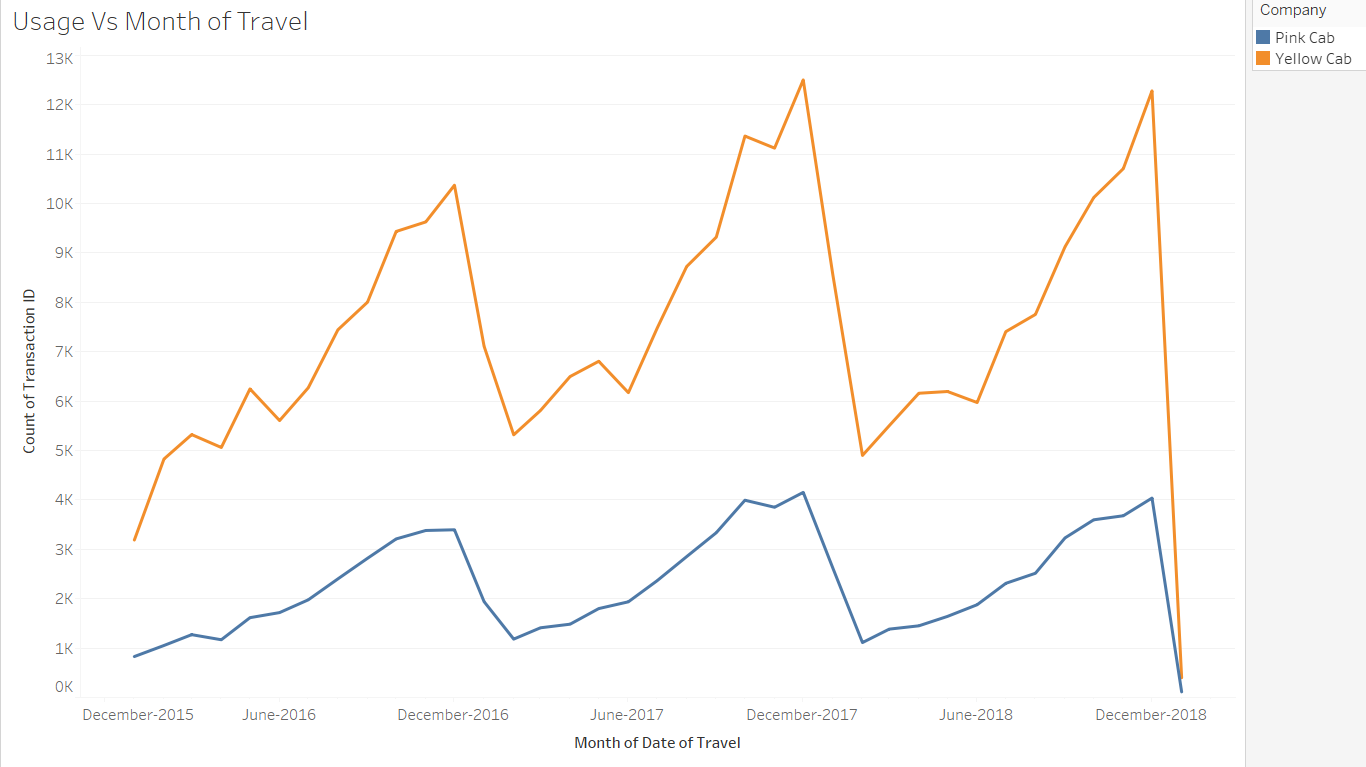

As it is shown in the above graph, it can be concluded that the number of cab users changes depending in on the period of the year

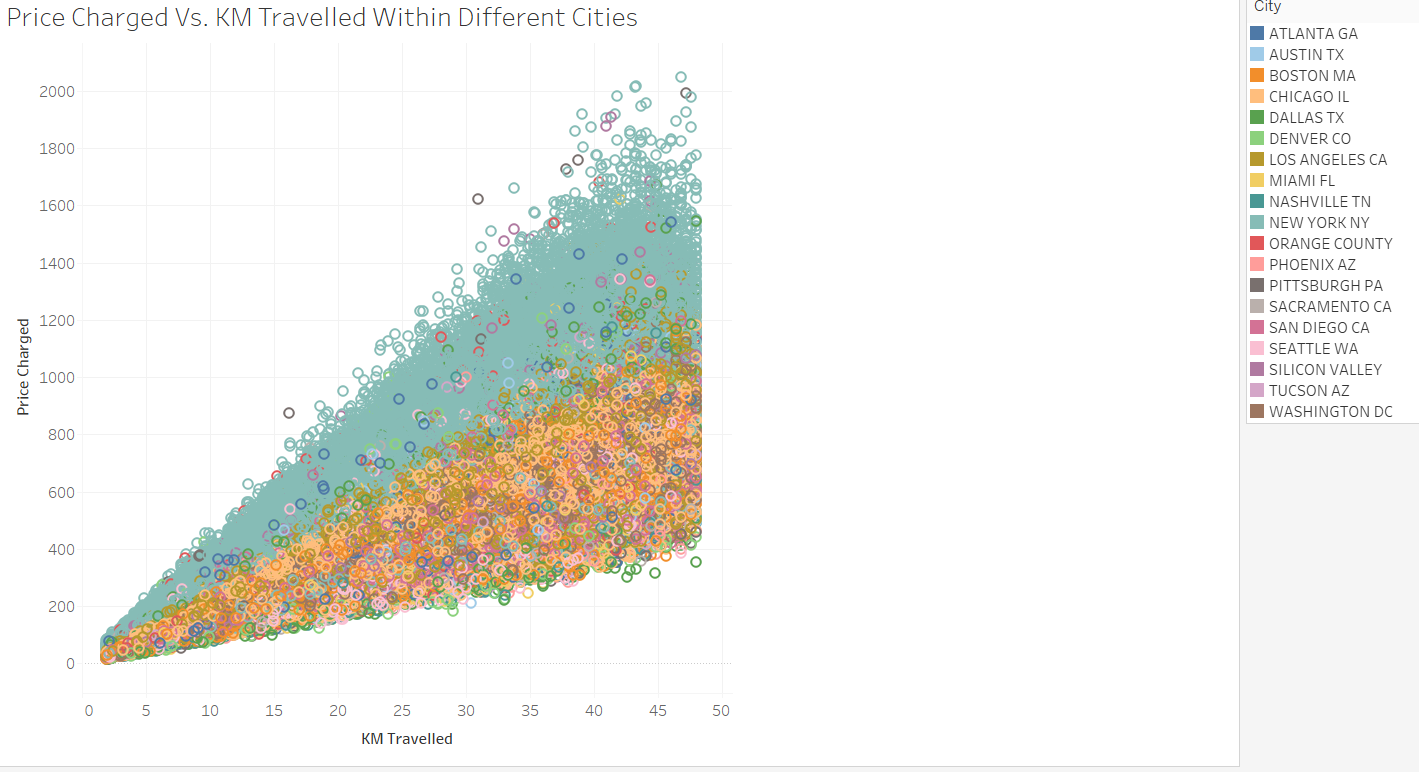

The above graph shows that the rate charged per KM is higher in highly dense areas such as New York. 

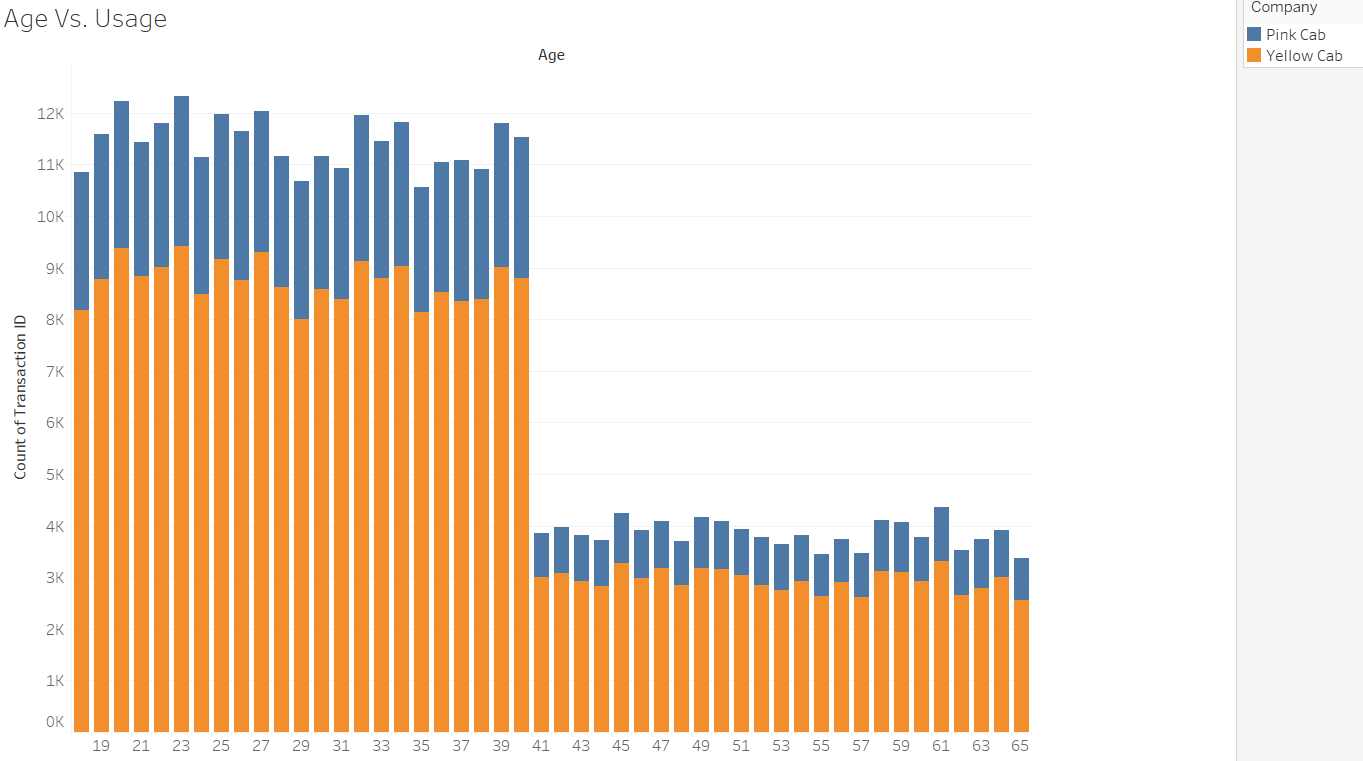

The above graph shows the demograph of the cab users. It shows that there are higher number of cab user in the range of 18 to 40 than the age range of 41 to 65. Additonal, it shows that yellow cabs are much more popular that Pink cab amoungs all age ranges. 

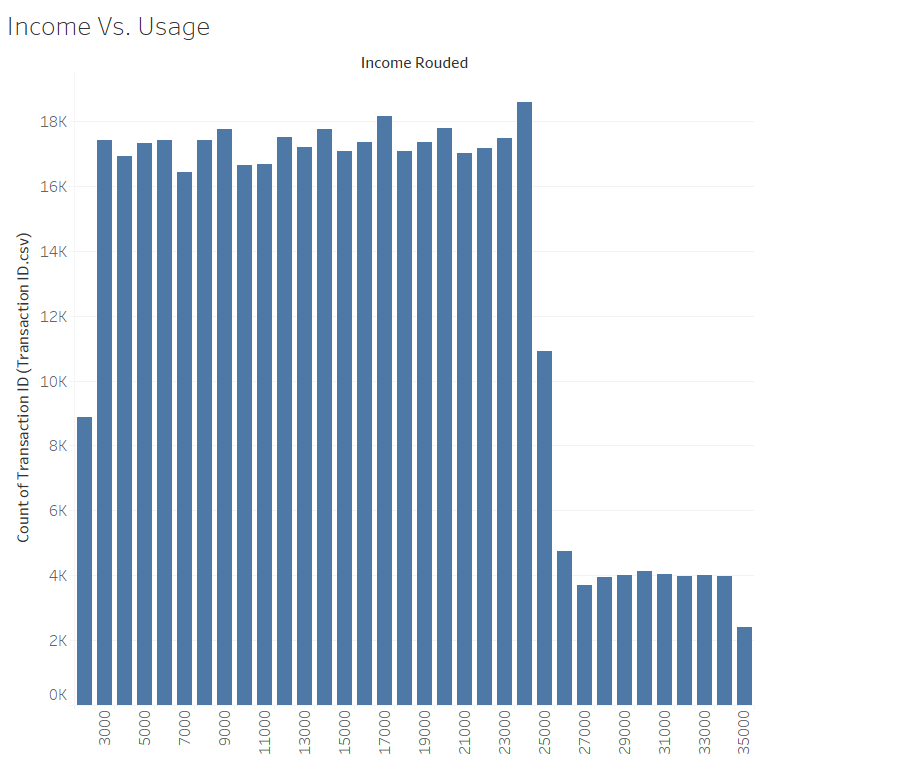

From the above graph, it is visible that most customers whos uses cabs has an income less that $26000 a month. 